# Desafio Hiperstream

Para começar o desenvolvimento do código primeiramente realizamos os imports necessários para o desenvolvimento da solução do desafio

In [1]:
import pandas as pd
import networkx as nx

Com auxílio da biblioteca Pandas, realizamos a leitura do csv e já transformamos num data frame

In [2]:
df = pd.read_csv("Baseparateste.csv", sep=";")

In [3]:
print (df)

      ID                                               Nome  \
0   3036                                 Cliente-FATURA-HSJ   
1   3037                           Cliente-FATURA-WFD-EMAIL   
2   3038                 Cliente-FATURA-WFD-EMAIL-ALEATORIO   
3   3039                   Cliente-FATURA-WFD-ARMAZENAMENTO   
4   3040          Cliente-FATURA-WFD-ARMAZENAMNTO-ALEATORIO   
5   3041                     Cliente-FATURA-QUEBRAPDF-EMAIL   
6   3042             Cliente-FATURA-QUEBRAPDF-ARMAZENAMENTO   
7   3043                 Cliente-FATURA-ACTION-EMAIL 1a VIA   
8   3044                    Cliente-FATURA-INPUBLOG-DIGITAL   
9   3045                    Cliente-FATURA-CARGAECM-DIGITAL   
10  3046                Cliente-FATURA-DPREPORT-FIMPROCESSO   
11  3048              Cliente-FATURA-WFD-IMPRESSO-ALEATORIO   
12  3049                            Cliente-FATURA-WFD-IEEN   
13  3050                    Cliente-FATURA-WFD-IMPRESSO-ECM   
14  3051                  Cliente-FATURA-MOVERSPOOL-GRA

Para primeira parte da resolução lógica do problema, verificamos quais IDs/Nomes estão ligados a quais Pasta de Origem, visto que para uma mesma Pasta de Origem é possível diversos valores IDs/Nomes diferentes. Sendo assim geramos um dicionário "adj" contendo todas entradas

In [4]:
adj={}

nome = df["Nome"]
pastaorigem = df["PastaOrigem"]

for i in range (len(df)):
    pastaorigem[i]
    nome[i]
    if pastaorigem[i] not in adj:
        adj[pastaorigem[i]] = [nome[i]]
    else:
        adj[pastaorigem[i]].append(nome[i])
print(adj)

{'E:\\PRODUCAO\\Cliente\\FATURA\\HSJ\\ENTRADA\\': ['Cliente-FATURA-HSJ'], 'E:\\PRODUCAO\\Cliente\\FATURA\\FORMATAR_FATURA\\PRINTNET\\ENTRADA\\': ['Cliente-FATURA-WFD-EMAIL', 'Cliente-FATURA-WFD-EMAIL-ALEATORIO', 'Cliente-FATURA-WFD-ARMAZENAMENTO', 'Cliente-FATURA-WFD-ARMAZENAMNTO-ALEATORIO', 'Cliente-FATURA-WFD-IMPRESSO-ALEATORIO', 'Cliente-FATURA-MOVERSPOOL-ARQ.-EXCLUSAO'], 'E:\\PRODUCAO\\Cliente\\FATURA\\SAIDAS\\PDF_UNICO\\': ['Cliente-FATURA-QUEBRAPDF-EMAIL', 'Cliente-FATURA-QUEBRAPDF-ARMAZENAMENTO', 'Cliente-FATURA-QUEBRAPDF-IMPRESSO'], 'E:\\PRODUCAO\\Cliente\\FATURA\\ACTION\\ENTRADA\\': ['Cliente-FATURA-ACTION-EMAIL 1a VIA', 'Cliente-FATURA-ACTION-EMAIL 2a VIA'], 'E:\\PRODUCAO\\Cliente\\FATURA\\INPUTBLOG\\': ['Cliente-FATURA-INPUBLOG-DIGITAL'], 'E:\\PRODUCAO\\Cliente\\FATURA\\CARGA_ECM\\': ['Cliente-FATURA-CARGAECM-DIGITAL'], 'E:\\PRODUCAO\\Cliente\\FATURA\\DPREPORT\\DPR_FIM_PROCESSAMENTO\\': ['Cliente-FATURA-DPREPORT-FIMPROCESSO'], 'E:\\PRODUCAO\\Cliente\\FATURA\\FORMATAR_FATURA\

Com essa informação dos {Pasta Destino : [IDs/Nomes]} em mãos, adicionamos uma condição a fim de verificar quais valores de Pasta Destino e Pasta Backup estão em "adj", gerando os edges

In [5]:
G = nx.MultiDiGraph()

for i in range (len(df)):
    destinos = []
    nome = df["Nome"][i]
    pastadestino = df["PastaDestino"][i]
    pastabackup = df["PastaBackup"][i]
    if pastadestino in adj:
        destinos.extend(adj[pastadestino])
    if pastabackup in adj:
        destinos.extend(adj[pastabackup])
    for destino in destinos:
        G.add_edge(nome , destino)

Setando o layout como Spring, porém existem diversas outras opções de "organização" e desenhando as ligações e os nós

{'Cliente-FATURA-WFD-EMAIL': Text(-0.04826832380693639, 0.1736889508132888, 'Cliente-FATURA-WFD-EMAIL'),
 'Cliente-FATURA-ACTION-EMAIL 1a VIA': Text(-0.1418685351087599, 0.1321626024119621, 'Cliente-FATURA-ACTION-EMAIL 1a VIA'),
 'Cliente-FATURA-ACTION-EMAIL 2a VIA': Text(-0.04462839187258463, 0.30679004557290923, 'Cliente-FATURA-ACTION-EMAIL 2a VIA'),
 'Cliente-FATURA-WFD-EMAIL-ALEATORIO': Text(-0.4528403627682545, -0.3096105047492777, 'Cliente-FATURA-WFD-EMAIL-ALEATORIO'),
 'Cliente-FATURA-INPUBLOG-DIGITAL': Text(-0.5270770669251167, -0.37307522484038946, 'Cliente-FATURA-INPUBLOG-DIGITAL'),
 'Cliente-FATURA-WFD-ARMAZENAMENTO': Text(0.029653207906923724, 0.116258173437936, 'Cliente-FATURA-WFD-ARMAZENAMENTO'),
 'Cliente-FATURA-CARGAECM-DIGITAL': Text(-0.13191509386528588, 0.22049777415512684, 'Cliente-FATURA-CARGAECM-DIGITAL'),
 'Cliente-FATURA-WFD-ARMAZENAMNTO-ALEATORIO': Text(-0.402980792077012, -0.3807338547500043, 'Cliente-FATURA-WFD-ARMAZENAMNTO-ALEATORIO'),
 'Cliente-FATURA-QUEBR

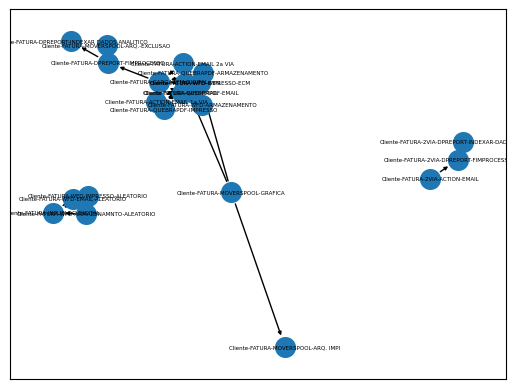

In [10]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G,pos, arrows=True, arrowsize=5)
nx.draw_networkx_labels(G,pos, font_size=4)